<a href="https://colab.research.google.com/github/Sehaj1904/Data-Science/blob/main/Project_on_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/Pepcoders/Data-Science-January/main/Logistic%20Regression/diabetes.csv")

In [2]:
data.head()   # Outcome is our target value and you must see that it has only 1 and 0 as values and Rest all are our Features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Checking whether any column has null values or not
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

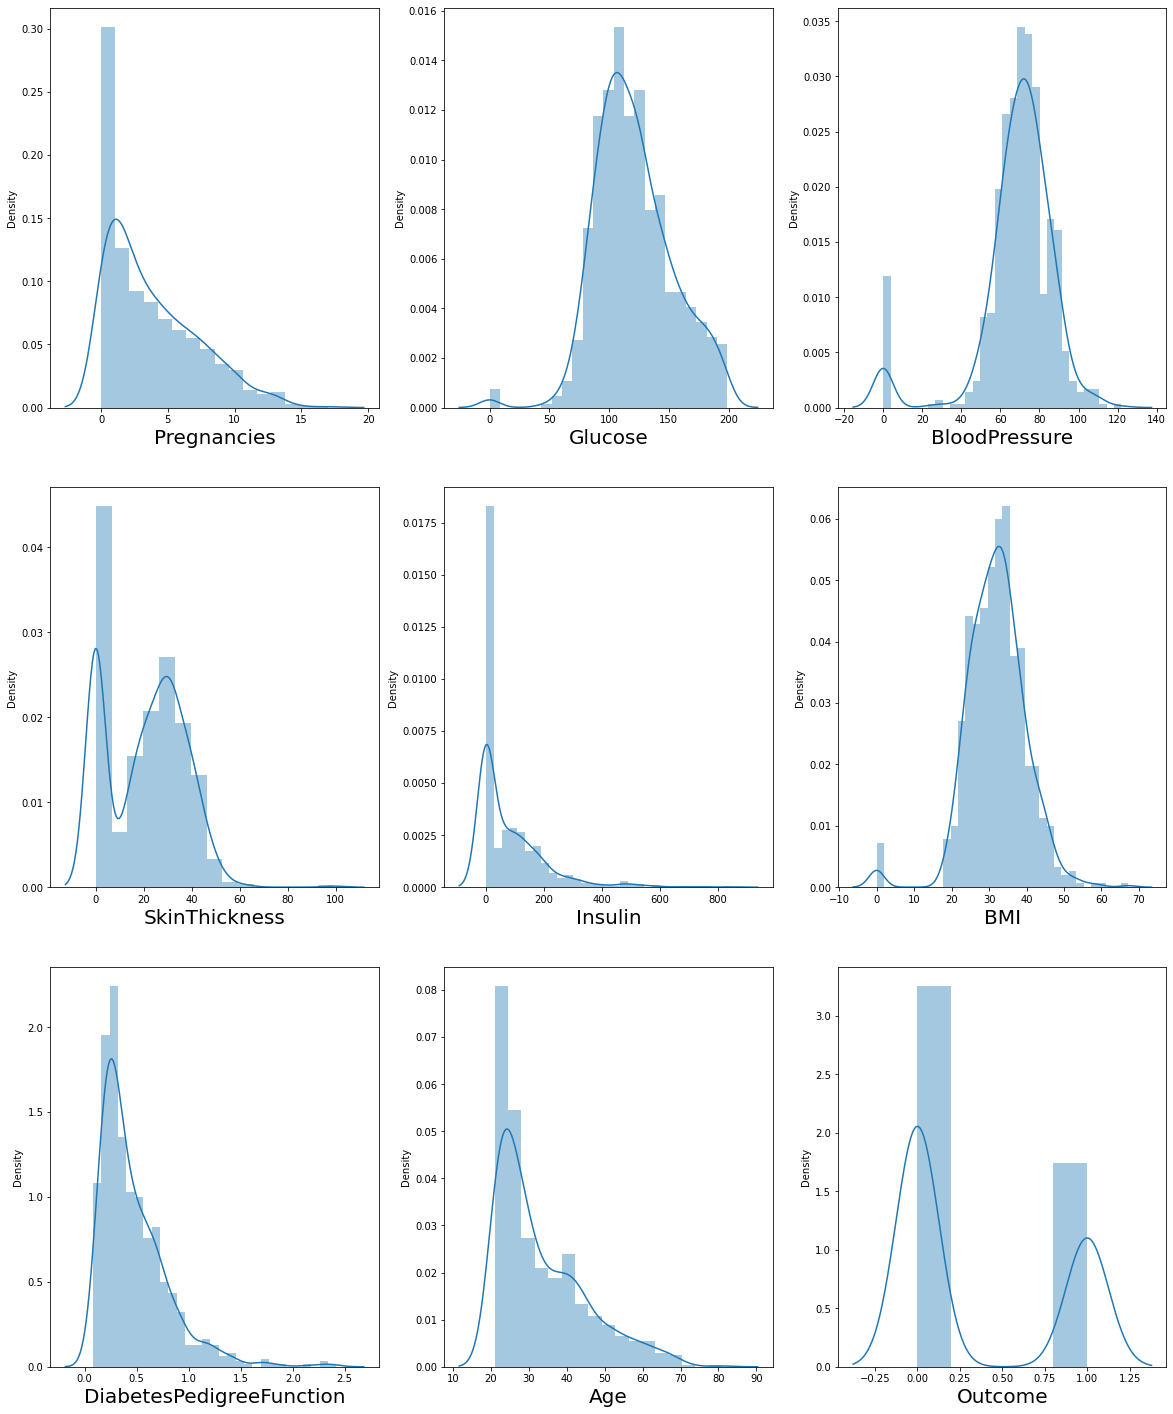

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

# you clrealy see that data set is uniformly distributed (means mean = 0 and standard deviation = 1) in all cases/graphs.
# check outcome has 2 me isliye hai because it has 2 values i.e 0 & 1.

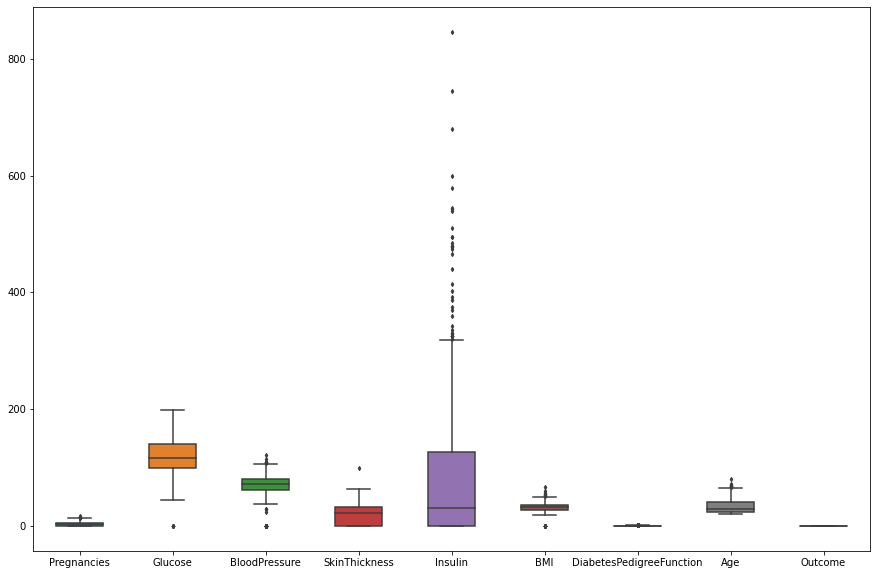

In [6]:
# For Outliers and we can see that insulin has maximum outliers

fig, ax = plt.subplots(figsize = (15,10))  # we increased the sizee of the figure in order to have clearly visible boxplot. 
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)  # ax is axis and ye bataega ki ye boxplot is ax axis pe banega 

In [7]:
X = data.drop(columns = ['Outcome'])    # Feature (by dropping outcome we got rest all)
y = data['Outcome']                     # Target

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

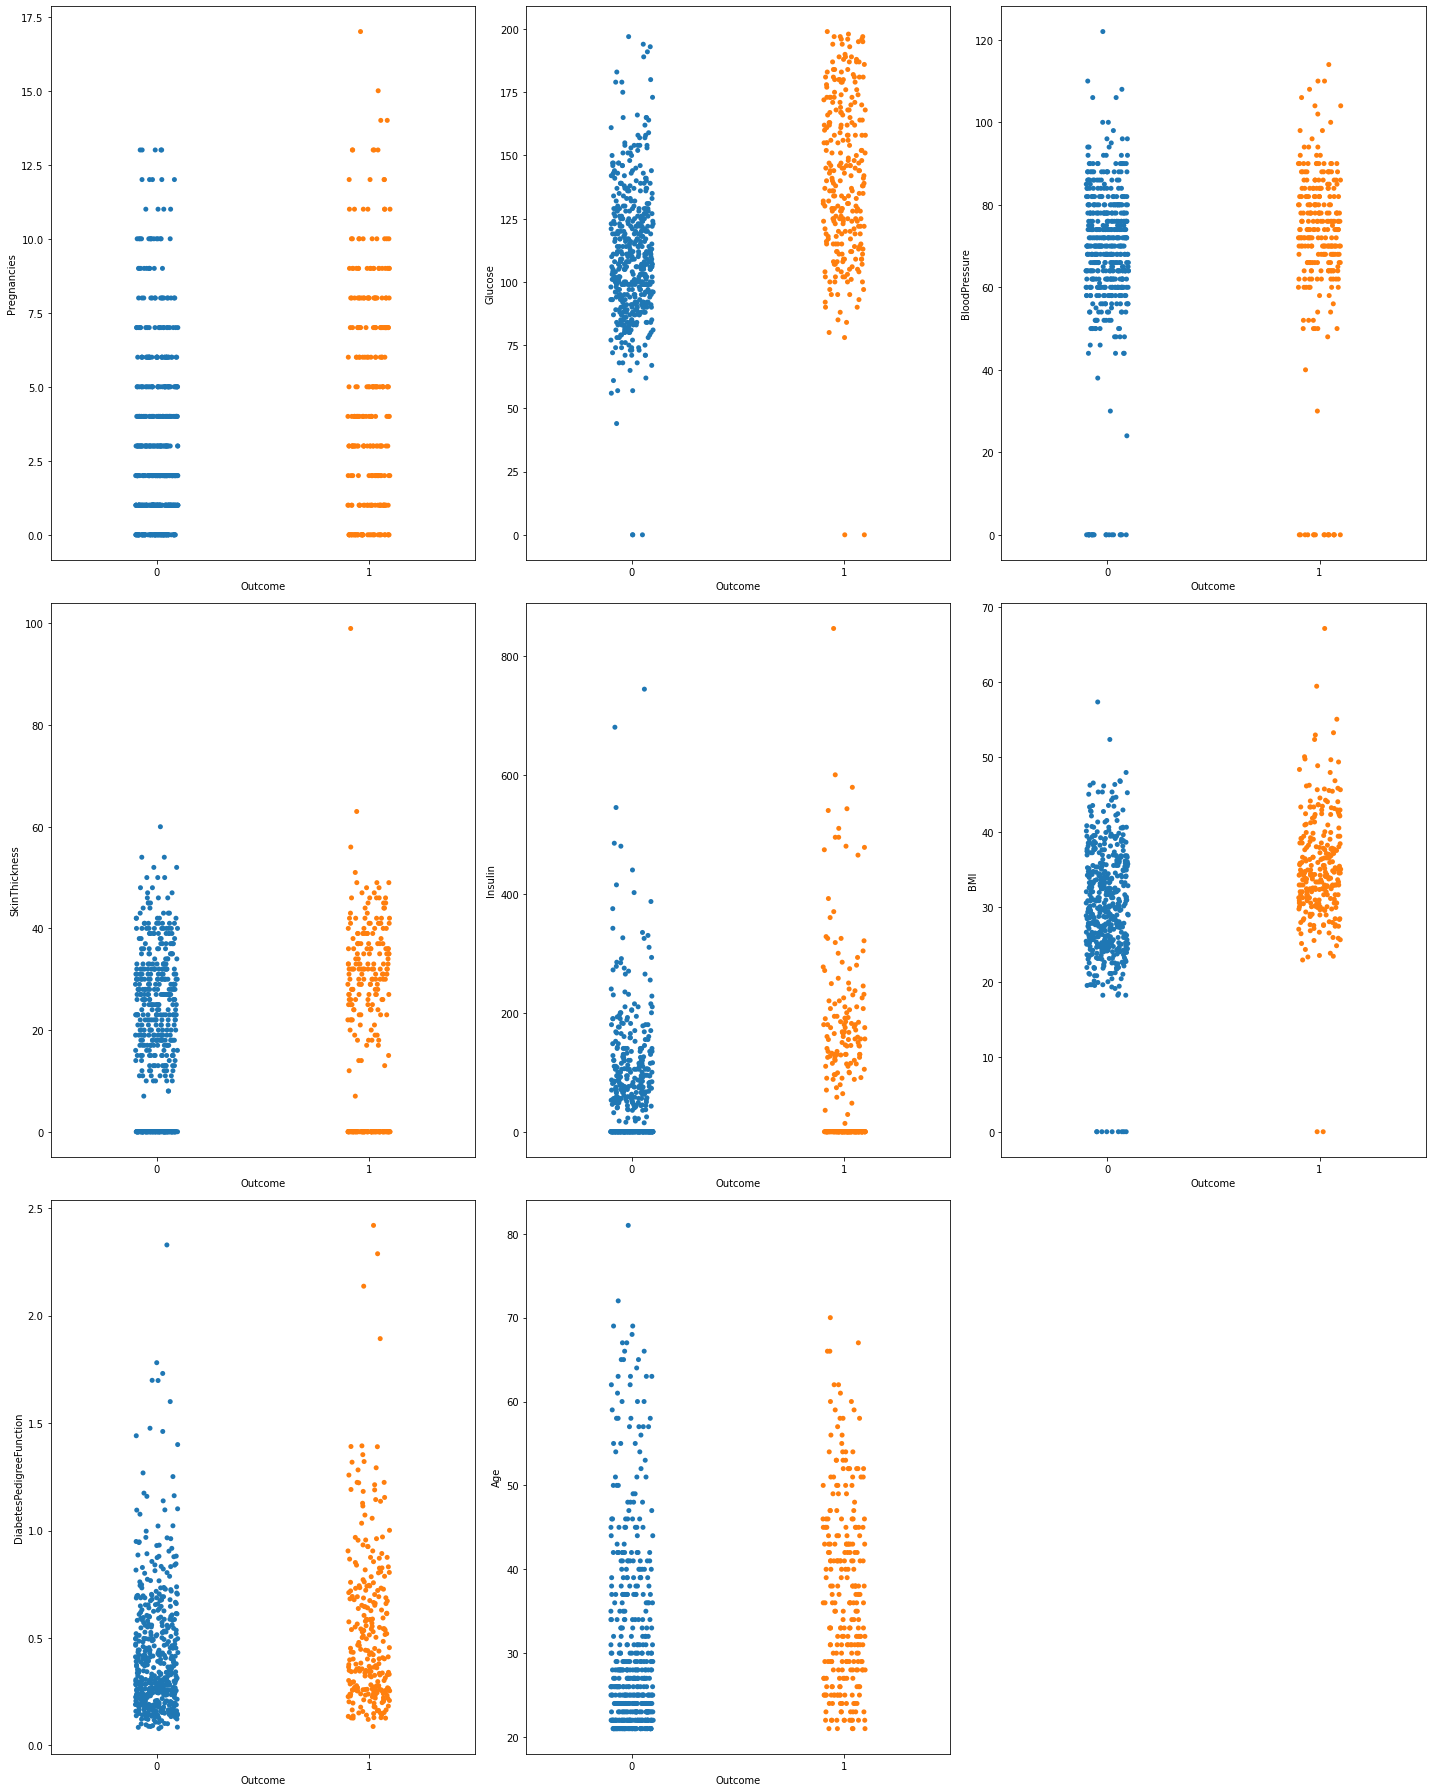

In [8]:
# Strip Plot
# strip plot ek feature and output/outcome/target ke beech me banata hai isliye  X or Y alag alag karke likhne/lene padhe isme 
# ye batata hai ki data kitna distributed hai alag alag columns pe for example glucose ka level 50 ya 75 tak jata hai to outcome 0 raheti hai
# aur thoda sa aur badh jata hai to glucose max 200 tak pahunchata hai 
# aur agar outcome 1 hai to glucose ka level max 178 ke arround ja raha hai check graph and same for skinThickness and Insulin

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1 

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [9]:
# we want that our dataset comes in a scale & also want that scale which has mean = 0 & std = 1 for that we are using StandardScaler

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [10]:
X_scaled    # scaled data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [11]:
# Now we want this trained data to be joined with testing for testing 

from sklearn.model_selection import train_test_split

# X_scaled here insted of x_test as we used that above 

X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 42) 

In [12]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

In [13]:
model.fit(X_train,y_train)

LogisticRegression()

In [14]:
model.score(X_test,y_test)

0.7401574803149606

In [15]:
# y_pred value store kar rahe hai model se predict karvake X_test ki as isko hum use karenge confusion matrix banane ke liye 
# y actual hai jo abhi y_test me padhi hai 

y_pred = model.predict(X_test)

In [16]:
# isse hume individually nikalne ki no need sab kuch pehle se hi classification_report me lagake dedi
# Support = It is the number of actual occurence of a class in a specified data (mtlb prediction me kitni baar 0 & 1 appear hua tha) baki 
# confusion matrix me dekho [ 0 kitni baari aaya prediction me (136 + 32) and 1 kitni baari aaya predictio me (34 + 52) ] 
# bascically count of prediction hota hai  

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       168
           1       0.62      0.60      0.61        86

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254



In [17]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,y_pred)    # y_test = actual values, y_pred = predicted values
conf_mat 

array([[136,  32],
       [ 34,  52]])

In [18]:
# just seperated the above confusion matrix

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [19]:
# model.score() uses accuray as you can see both have same values 

Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
Accuracy

0.7401574803149606

In [20]:
Precision = true_positive / (true_positive + false_positive)
Precision

0.8095238095238095

In [21]:
Recall = true_positive / (true_positive + false_negative)
Recall

0.8

In [22]:
# F1 Score as we need both precision and recall 
F1_Score = 2 * (Recall * Precision) / (Recall + Precision)
F1_Score

0.8047337278106509

In [23]:
# AUC (Area under Curve)

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)

auc

0.7070874861572536

In [24]:
# ROC (Receiver operating Characteristic)

from sklearn.metrics import roc_curve

# fpr = false positive rate, tpr = true positive rate
# here we get fpr, tpr, threshold throght roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_pred)

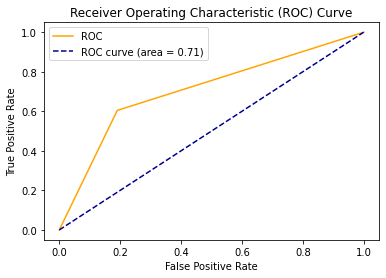

In [25]:
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--', label = 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()